In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

In [2]:
# Constants
TEST_SIZE = 0.3
RANDOM_STATE = 42

In [5]:
def load_and_split_data(test_size=TEST_SIZE, random_state=RANDOM_STATE):

    digits = load_digits()
    X = digits.data
    y = digits.target
    # Use stratify to keep class proportions in train/test sets
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    return digits, X_train, X_test, y_train, y_test



In [7]:
def plot_sample_digits(digits, n_samples=8):

    n_samples = min(n_samples, len(digits.images))
    fig, axes = plt.subplots(1, n_samples, figsize=(n_samples * 1.5, 2))
    for i, ax in enumerate(axes):
        ax.imshow(digits.images[i], cmap="gray", interpolation="nearest")
        ax.set_title(str(digits.target[i]))
        ax.axis("off")
    fig.suptitle("Sample digits (true labels)")
    plt.tight_layout()
    plt.show()

In [8]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name="Model"):
    """Train model, print accuracy, and plot confusion matrix.

    Returns the accuracy (float).
    """
    # Fit the model
    model.fit(X_train, y_train)

    # Predict and score
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    # Print simple accuracy line
    print(f"{model_name} accuracy: {acc:.4f}")

    # Confusion matrix (clean plot via sklearn helper)
    disp = ConfusionMatrixDisplay.from_estimator(
        model, X_test, y_test, display_labels=np.arange(10)
    )
    disp.ax_.set_title(f"{model_name} — Confusion Matrix")
    plt.tight_layout()
    plt.show()

    return acc

Digits dataset loaded.
Total samples: 1797
Image shape: (8, 8)


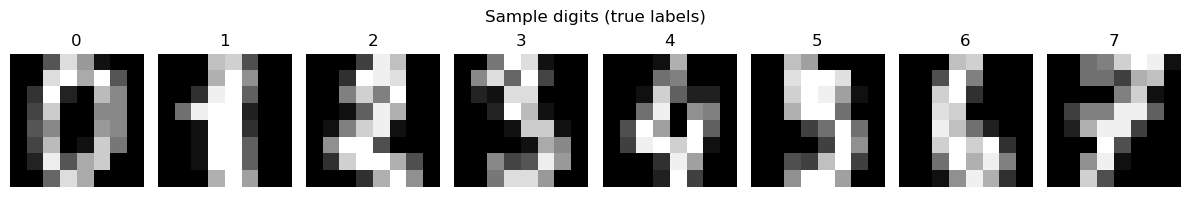

Logistic Regression accuracy: 0.9574


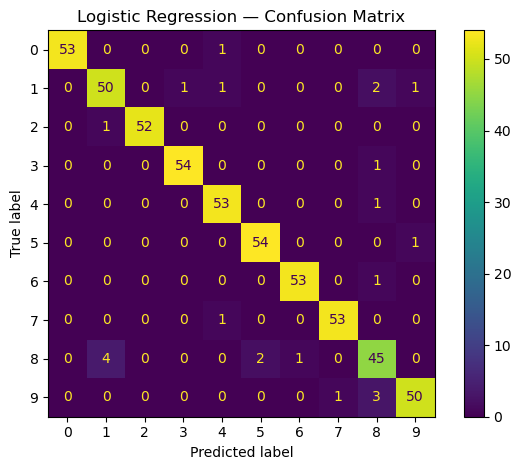

Random Forest accuracy: 0.9648


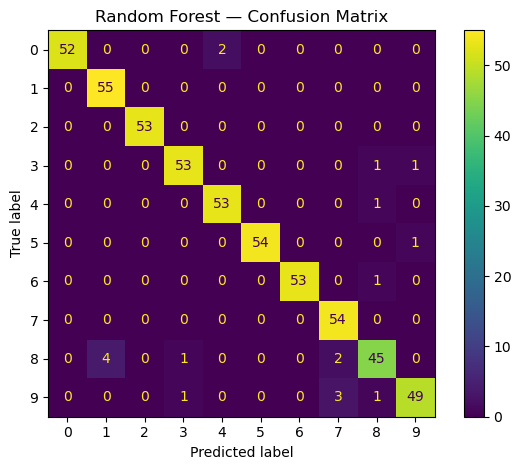


Summary of results:
              Model  Accuracy (%)
Logistic Regression         95.74
      Random Forest         96.48

Short summary (plain English):
- Accuracy tells how many test digits were predicted correctly.
- Confusion matrix shows which digits get confused with which.
- Expect Random Forest to be slightly better than Logistic Regression
  because it can capture non-linear boundaries and interactions.
- Common confusions: 1 vs 7, and 4 vs 9 (handwriting variability).


In [9]:
if __name__ == "__main__":
    # 1. Load and split
    digits, X_train, X_test, y_train, y_test = load_and_split_data()

    # 2. Quick data checks and visualization
    print("Digits dataset loaded.")
    print(f"Total samples: {len(digits.data)}")
    print(f"Image shape: {digits.images[0].shape}")
    plot_sample_digits(digits, n_samples=8)

    # 3. Define models (simple sensible defaults)
    logreg = LogisticRegression(max_iter=1000, random_state=RANDOM_STATE)
    rf = RandomForestClassifier(n_estimators=200, random_state=RANDOM_STATE)

    # 4. Train & evaluate
    results = {}
    results['Logistic Regression'] = evaluate_model(
        logreg, X_train, X_test, y_train, y_test, model_name='Logistic Regression')

    results['Random Forest'] = evaluate_model(
        rf, X_train, X_test, y_train, y_test, model_name='Random Forest')

    # 5. Summary table (simple and readable)
    results_df = pd.DataFrame(
        list(results.items()), columns=['Model', 'Accuracy']
    )
    results_df['Accuracy (%)'] = (results_df['Accuracy'] * 100).round(2)
    print("\nSummary of results:")
    print(results_df[['Model', 'Accuracy (%)']].to_string(index=False))

    # 6. Short human-friendly summary (print)
    print("\nShort summary (plain English):")
    print("- Accuracy tells how many test digits were predicted correctly.")
    print("- Confusion matrix shows which digits get confused with which.")
    print("- Expect Random Forest to be slightly better than Logistic Regression")
    print("  because it can capture non-linear boundaries and interactions.")
    print("- Common confusions: 1 vs 7, and 4 vs 9 (handwriting variability).")